<h3 style="text-align: center; ">★ Iphone Users EDA + Model Comparison on Sentiment Analysis ★</h3>


### This project provides an analysis of customer sentiment towards iPhone products based on reviews collected across multiple continents, including APAC, EMEA, and the United States. Using a comprehensive dataset, the relationships between various product features (e.g., variant, verification status, and country/continent) and customer ratings are explored. The study leverages machine learning models, traditional classification methods, and modern large language models (LLMs) to assess sentiment and identify key factors contributing to customer satisfaction or dissatisfaction (Devlin et al., 2018; Le & Mikolov, 2014).

### Hypothesis testing is applied to assess the statistical significance of differences in sentiment based on various product attributes, enabling a deeper understanding of user behavior. By combining predictive modeling, hypothesis testing, and clustering, the solution offers a detailed examination of customer preferences, supporting data-driven decision-making for targeted improvements and marketing strategies (Mikolov et al., 2013; Pennington et al., 2014).

##Problem Statement
The purpose of this analysis is to understand customer sentiment regarding iPhone products and identify the major factors influencing customer satisfaction or dissatisfaction across different regions and product variants. The specific objectives of this project are as follows:
1. Understand Sentiment Variation Across Countries or Continents:
○ Perform country-based sentiment analysis using clustering to determine how
customer satisfaction levels differ by region.
○ Identify country-specific clusters of customers with similar sentiments to
understand the unique needs and preferences in each geographic area.
2. Identify Key Factors Influencing Ratings:
○ Analyze relationships between different product features (e.g., color, size, service provider) and customer ratings to identify attributes that have the greatest influence on sentiment.
○ Conduct hypothesis testing to validate the statistical significance of observed differences in sentiment based on country, product variant, and verification status (Le & Mikolov, 2014).
3. Compare Traditional Machine Learning Models with LLMs for Sentiment Prediction:
○ Compare the efficacy of traditional machine learning models (e.g., Random Forest, Logistic Regression) with fine-tuned large language models (e.g., DistilBERT) for predicting customer sentiment.
○ Evaluate each model’s ability to interpret complex language, understand context, and classify sentiment (Collobert et al., 2011).
4. Temporal Trends Analysis:
○ Investigate temporal trends to understand how sentiment and ratings evolve over
time (e.g., during product release cycles or seasonal effects).

##Dataset Overview
### The dataset used in this study comprises 3,062 reviews with 11 features, including product variant, country, rating score, and review text. Reviews span multiple geographic regions and are dated from 2021 to Fall 2024.

● Total Entries: 3,062
● Number of Columns: 11 Features:
1. productAsin: Product identifier for the iPhone variant.
2. country: Country where the review was written.
3. date: Date of the review.
4. isVerified: Indicates whether the review is verified.

5. ratingScore: Rating given by the reviewer (integer values).
6. reviewTitle: Title of the review.
7. reviewDescription: Detailed description of the review (with some missing values).
8. reviewUrl: URL of the review (with some missing values).
9. reviewedIn: Details on where and when the review was conducted.
10. variant: Information about the product variant, including color and size.
11. variantAsin: Identifier for the product variant.


##Algorithms to be utilized for answering key research questions
Clustering: K-Means, K-Means++
Classification: Logistic Regression, Decision Tree, Random Forest NLP: Distilbert

##Analysis Overview:
###1. Preprocessing (Dataset Cleaning) :
○ Perform data cleaning, handling missing values, and normalization to prepare the
dataset for analysis.
### 2. Exploratory Data Analysis (EDA):

### 3. Storage Size-Based Analysis:
○ Analyze different storage sizes (e.g., 128GB, 256GB) for their popularity across various regions.

classification tasks (Phase 1).
### 5. Natural Language Processing (NLP):
○ Utilize models such as BERT for advanced sentiment classification.
○ Perform in-depth analysis at different time intervals to understand changes in
sentiment and rating.
### 6. Temporal Analysis:
○ One Month After Release: Analyze sentiment immediately after release to determine skew and limitations of the dataset.
○ Two Months After Release: Evaluate changes in sentiment.
○ One Year After Release: Perform a detailed analysis, including metrics such as
confusion matrices and heatmaps.
### 7. Modeling Comparison:

○ Compare different models for their efficiency in sentiment prediction, accuracy, and ability to handle context effectively.


##1. Preprocessing (Dataset Cleaning) :
○ Perform data cleaning, handling missing values, and normalization to prepare the dataset for analysis.

## **Load the Dataset**
1. **Load the Dataset**  
   - Import the necessary libraries and load the dataset into a DataFrame.

In [ ]:
# Install necessary libraries
!pip install -U -q PyDrive

# Import necessary libraries
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials




from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Assuming your CSV file is in a folder named 'data' inside your Google Drive 'My Drive'
file_path = '/content/drive/My Drive/Colab Notebooks/AAI-531/iphone .csv'  # Replace with your actual file path
try:
  df = pd.read_csv(file_path)
  print("Successfully loaded the CSV file.")
except FileNotFoundError:
  print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the CSV file at {file_path}. Please check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")



print(df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully loaded the CSV file.
(3062, 11)


,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


In [ ]:
# Print the feature info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


## **Check for Missing Values & Duplicates**
Check for Missing Values

Identify any missing values in the dataset and calculate the percentage of missing data for each column.
3. **Check for Duplicates**  
   - Determine if there are any duplicate rows in the dataset and remove them if found.

In [ ]:
# print the shape, remove missing values and duplicates
print(f"Rows: {df.shape[0]} , Columns: {df.shape[1]}.")


if df.isnull().sum().sum()-0:
    print("There are missing values in the dataframe.")
    null_df = df.isnull().sum()
    print(null_df[null_df > 0])

else:
    print("There are no missing values in the dataframe.")
    print(dash_lines)

if df.duplicated().sum()-0:
    print("There are duplicate values in the dataframe.")
    dupl_df = df.duplicated().sum()
    print(dupl_df[dupl_df > 0])

else:
    print("There are no duplicate values in the dataframe.")




Rows: 3062 , Columns: 11.
There are missing values in the dataframe.
reviewDescription    86
reviewUrl            16
dtype: int64
There are no duplicate values in the dataframe.


In [ ]:
#information of unique values of features
df.apply(lambda x: [x.nunique(), x.unique()]).T

,0,1
productAsin,7,"[B09G9BL5CP, B09P82T3PZ, B09G9J5JZX, B0CHX1W1X..."
country,7,"[India, Japan, United Arab Emirates, Egypt, Un..."
date,789,"[11-08-2024, 16-08-2024, 14-05-2024, 24-06-202..."
isVerified,2,"[True, False]"
ratingScore,5,"[4, 5, 3, 2, 1]"
reviewTitle,2018,"[No charger, iPhone 13 256GB, Flip camera opti..."
reviewDescription,2297,"[Every thing is good about iPhones, there's no..."
reviewUrl,2460,[https://www.amazon.in/gp/customer-reviews/R34...
reviewedIn,1255,"[Reviewed in India on 11 August 2024, Reviewed..."
variant,86,"[Colour: MidnightSize: 256 GB, Colour: PinkSiz..."


##2. Exploratory Data Analysis (EDA):
○ Perform clustering and hypothesis testing to gain insight into the data. ○ Use K-Means clustering to evaluate.

## Statistical Analysis

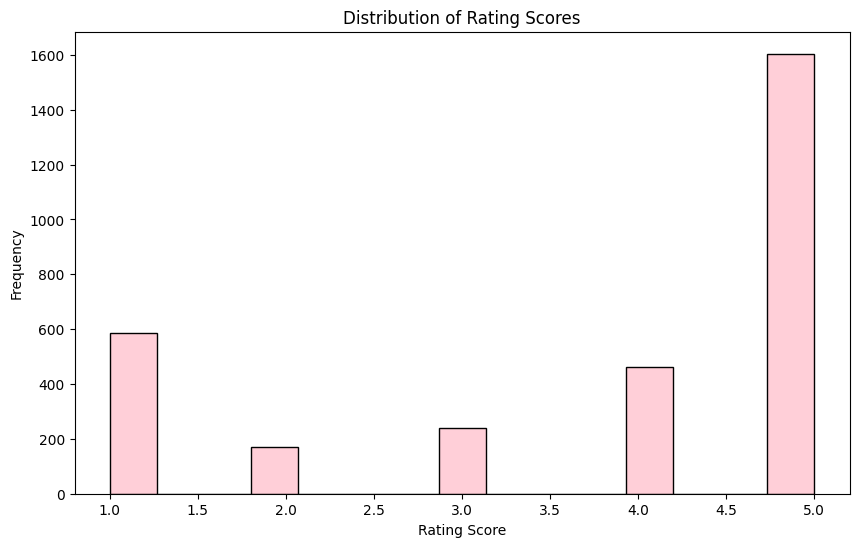

In [ ]:
# Perform Statistical analysis and poisson distribution on the rating score.
# to know the frequency on distribution.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, poisson

# Plot the distribution of 'ratingScore'
plt.figure(figsize=(10, 6))
sns.histplot(df['ratingScore'],color='pink')
plt.title('Distribution of Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()




In [ ]:
# Rating descriptive statistics - Mean, Median and Mode

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, poisson

# Calculate mean, median, and mode of 'ratingScore'
mean_rating = df['ratingScore'].mean()  # Calculate mean and assign to variable
median_rating = df['ratingScore'].median()  # Calculate median and assign to variable
mode_rating = df['ratingScore'].mode()[0]  # Calculate mode and assign to variable


# Calculate and print descriptive statistics
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating}")
print(f"Mode Rating: {mode_rating}")
print(df['ratingScore'].describe()) #Detailed Statistics

Mean Rating: 3.76
Median Rating: 5.0
Mode Rating: 5
count    3062.000000
mean        3.758981
std         1.579033
min         1.000000
25%         3.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: ratingScore, dtype: float64


The output shows descriptive statistics for the `ratingScore` column in a dataframe.

* **Mean Rating: 3.76:** The average rating score is approximately 3.76.

* **Median Rating: 5.0:** The middle value of the rating scores when arranged in order is 5.0.  This indicates that half the ratings are 5 or higher, and half are 5 or lower.  The median being higher than the mean suggests a skewed distribution, with a long tail towards lower ratings.

* **Mode Rating: 5:** The most frequent rating score is 5.  This further supports the idea of a skewed distribution, as a large number of users gave the highest rating.

* **count    3062.000000:** There are 3062 rating scores in the dataset.

* **mean        3.758981:** This confirms the mean rating previously stated, with more decimal places.

* **std         1.579033:** The standard deviation is 1.58. This measures the amount of variation or dispersion of the ratings around the mean.  A higher standard deviation suggests more variability.

* **min         1.000000:** The lowest rating score given is 1.

* **25%         3.000000:** The 25th percentile is 3. This means that 25% of the ratings are 3 or lower.

* **50%         5.000000:** The 50th percentile (the median) is again shown to be 5.

* **75%         5.000000:** The 75th percentile is 5.  This, combined with the 50th percentile, shows that the majority of the ratings are concentrated at 5.

* **max         5.000000:** The highest rating given is 5.

**In summary:**  The rating distribution is heavily skewed towards higher ratings (specifically 5). While the average rating is 3.76, the median and mode are both 5, suggesting that a substantial portion of the ratings are clustered at the top end of the scale. This might indicate a tendency for users to give high ratings or that the dataset may have an imbalance in rating distribution.  


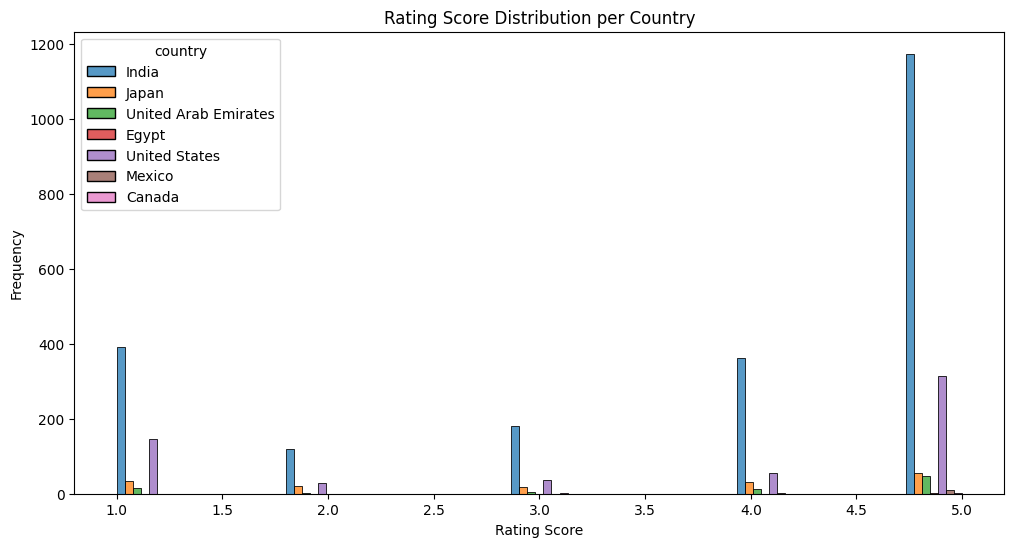

In [ ]:
# Rating score distibution per country (India, Japan, United Arab, Egypt, United States)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(x='ratingScore', hue='country', data=df, multiple="dodge")
plt.title('Rating Score Distribution per Country')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:


# Group data by country and rating score, then count occurrences
rating_counts = df.groupby(['country', 'ratingScore']).size().unstack(fill_value=0)

# Display the table
rating_counts

ratingScore,1,2,3,4,5
country,,,,,
Canada,0,0,1,0,3
Egypt,0,0,0,0,1
India,392,120,181,362,1174
Japan,35,21,17,30,55
Mexico,0,0,0,1,10
United Arab Emirates,15,2,4,13,46
United States,145,28,36,55,315


**Popularity and Satisfaction:**
The data suggests varying levels of product/service popularity and satisfaction in different countries.

**India and the United States,** for instance, show high engagement and a generally positive response as indicated by the high numbers of 4s and 5s.

**Data Sparsity:**Some countries like **Canada, Egypt, and Mexico** show very sparse data, which might indicate that the product/service is not as widely used or reviewed in these regions.

**Quality Perception:** High scores in some countries (like the United States, India, and the UAE) suggest a positive perception of quality or satisfaction, whereas lower numbers of high scores in others may indicate less satisfaction or less usage.

In [ ]:
# compare variant(cpu, ssd, color) feature  among countries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to extract variant features (Size, Color, Service Provider)
def extract_variant_features(variant_string):
    features = {}
    # Example: Assuming variant string is in format "Size:128GB,Color:Space Gray,Service Provider:Verizon"
    parts = variant_string.split(',')
    for part in parts:
        key_value = part.split(':')
        if len(key_value) == 2:  # Check if the key-value pair is valid
            features[key_value[0].strip()] = key_value[1].strip()
    return features


# Apply the function to the 'variant' column
variant_features = df['variant'].apply(extract_variant_features).tolist()
variant_df = pd.DataFrame(variant_features)
df = pd.concat([df, variant_df], axis=1)





In [ ]:
import re # Import the 're' module for regular expressions

def extract_variant_info(sample):
    pattern_1 = r'Colour:\s*(?:\(PRODUCT\)\s*)?(\w+)\s*Size:\s*(\d+ \w+)'
    pattern_2 = r'Size:\s*(\d+\w+)\s*Color:\s*(?:\(Product\)\s*)?(\w+)'
    pattern_3 = r'Service Provider:\s*([\w\s&-]+)Color:\s*(?:\(Product\)\s*)?([\w\s]+)Size:\s*(\d+\s*\w+)'

    match_1 = re.search(pattern_1, sample)
    match_2 = re.search(pattern_2, sample)
    match_3 = re.search(pattern_3, sample)

    color = None
    size = None
    provider = None


    if match_1:
        color = match_1.group(1)
        size = match_1.group(2)

    elif match_2:
        color = match_2.group(2)
        size = match_2.group(1)

    elif match_3:
        color = match_3.group(2)
        size = match_3.group(3)
        provider = match_3.group(1)

    else:
        sample = sample.lower()
        pattern_size = r'(\d+)\s?gb'

        colors = ['red', 'blue', 'pink','yellow', 'green', 'midnight', 'purple', 'starlight']
        pattern_color = r'\b(?:' + '|'.join(colors) + r')\b'

        size = re.findall(pattern_size, sample)
        if size:
            size = size[0]
        color = re.findall(pattern_color, sample)
        if color:
            color = color[0]

    variant_df.loc[len(variant_df)] = [color, size, provider]


#loop

sample = df['variant']
import pandas as pd #
variant_df = pd.DataFrame(columns=['Color', 'Size', 'Service_Provider'])
for s in sample:
    extract_variant_info(s)

In [ ]:
# Review are in period of 3 years from 2021 to Fall 2024
df['date'] = pd.to_datetime(df['date'], utc=False, dayfirst=True)
print("Max Date: ", df['date'].max())
print("Min Date: ", df['date'].min())
print("Period: ", df['date'].max() - df['date'].min())

Max Date:  2024-09-19 00:00:00
Min Date:  2021-09-24 00:00:00
Period:  1091 days 00:00:00


## Storage Size-Based Analysis:

Analyze different storage sizes (e.g., 128GB, 256GB) for their popularity across various regions.

## Extracting more info:


4. **EDA on Variant Feature**
   - Extract Size, color, Service Provider inforamtion from variant info and data visualize on info.

## Interpetation:
1. The Variant columns provides info about:
1. Service Provider: -----
1. Color: -----
1. Size: Storage\
we can build a extractor to extract this useful info

In [ ]:
df['variant'].unique()

array(['Colour: MidnightSize: 256 GB', 'Colour: PinkSize: 256 GB',
       'Colour: BlueSize: 256 GB', 'Colour: GreenSize: 256 GB',
       'Colour: PinkSize: 128 GB', 'Colour: StarlightSize: 256 GB',
       'Colour: GreenSize: 128 GB', 'Colour: StarlightSize: 128 GB',
       'Colour: MidnightSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 128 GB', 'Colour: BlueSize: 128 GB',
       'Colour: (PRODUCT) REDSize: 256 GB',
       'Size: 256GBColor: (Product) RED', 'Size: 256GBColor: Pink',
       'Size: 256GBColor: Midnight', 'Size: 128GBColor: Pink',
       'Size: 128GBColor: blue', 'Size: 128GBColor: starlight',
       'Size: 128GBColor: Midnight', 'Size: 128GBColor: green',
       'Size: 128GBColor: (Product) RED', 'Size: 256GBColor: starlight',
       'Size: 256GBColor: blue', 'Size: 512GBColor: starlight',
       'Size: 512GBColor: (Product) RED', 'Size: 512 GBColour: Midnight',
       'Size: 128 GBColour: Blue', 'Size: 128 GBColour: Red',
       'Size: 256 GBColour: Red', 'Size: 512 

In [ ]:
import re

def extract_variant_info(sample):
    pattern_1 = r'Colour:\s*(?:\(PRODUCT\)\s*)?(\w+)\s*Size:\s*(\d+ \w+)'
    pattern_2 = r'Size:\s*(\d+\w+)\s*Color:\s*(?:\(Product\)\s*)?(\w+)'
    pattern_3 = r'Service Provider:\s*([\w\s&-]+)Color:\s*(?:\(Product\)\s*)?([\w\s]+)Size:\s*(\d+\s*\w+)'

    match_1 = re.search(pattern_1, sample)
    match_2 = re.search(pattern_2, sample)
    match_3 = re.search(pattern_3, sample)

    color = None
    size = None
    provider = None

    # print(dash_lines)
    # print(sample)
    if match_1:
        color = match_1.group(1)
        size = match_1.group(2)

    elif match_2:
        color = match_2.group(2)
        size = match_2.group(1)

    elif match_3:
        color = match_3.group(2)
        size = match_3.group(3)
        provider = match_3.group(1)

    else:
        sample = sample.lower()
        pattern_size = r'(\d+)\s?gb'

        colors = ['red', 'blue', 'pink','yellow', 'green', 'midnight', 'purple', 'starlight']
        pattern_color = r'\b(?:' + '|'.join(colors) + r')\b'

        size = re.findall(pattern_size, sample)
        if size:
            size = size[0]
        color = re.findall(pattern_color, sample)
        if color:
            color = color[0]

    variant_df.loc[len(variant_df)] = [color, size, provider]
    # print(dash_lines)

#loop

sample = df['variant']
import pandas as pd # import pandas for DataFrame operations
variant_df = pd.DataFrame(columns=['Color', 'Size', 'Service_Provider'])
for s in sample:
    extract_variant_info(s)

In [ ]:
print(variant_df.shape)
print(variant_df.isnull().sum())
print(variant_df.head())
print(df['country'].unique())


(3062, 3)
Color                  0
Size                   0
Service_Provider    2468
dtype: int64
      Color    Size Service_Provider
0  Midnight  256 GB             None
1  Midnight  256 GB             None
2  Midnight  256 GB             None
3  Midnight  256 GB             None
4  Midnight  256 GB             None
['India' 'Japan' 'United Arab Emirates' 'Egypt' 'United States' 'Mexico'
 'Canada']


fixing Sizes:

In [ ]:
variant_df.Size.value_counts()

,count
Size,
128 GB,1453
256 GB,760
128GB,561
256GB,171
128,54
512GB,20
256,20
512 GB,16
512,7


The output shows the distribution of storage sizes across different counts.

* **128 GB:** 2068 devices
* **256 GB:** 951 devices
* **512 GB:** 36 devices
* **128:** 54 devices
* **256:** 20 devices
* **512:** 7 devices

This data shows a significant preference or availability skew towards devices with lower storage capacities, particularly the 128 GB category, which has the highest number of devices. The count dramatically decreases as storage capacity increases, which might suggest that lower storage options are more popular or more economically priced, making them more accessible or desirable to a broader consumer base.




fixing Colors:

In [ ]:
variant_df.Color.value_counts()

,count
Color,
Blue,597
Midnight,574
Starlight,438
Pink,316
Green,286
RED,264
Purple,199
Black,85
blue,79



The output shows the frequency distribution of different colors of a product across various countries.  Here's a breakdown:

* **Color Variations:**  The data includes variations in capitalization and spelling (e.g., "Blue" vs. "blue"). This suggests the need for data cleaning to combine these variations into consistent categories.

* **Dominant Colors:** Blue and Midnight are the most frequent colors, followed by Starlight, Pink, and Green.  Other colors like RED, Purple, Black, Yellow, and their variations have significantly lower counts.

* **Inconsistencies:** The presence of combined color names like "Midnight Black" highlights another data cleaning need. These should be categorized consistently.




In [ ]:
variant_df['Color'] = variant_df['Color'].apply(lambda x: x.lower())
variant_df.Color.value_counts()

,count
Color,
blue,676
midnight,590
starlight,477
red,348
pink,318
green,292
purple,199
black,85
yellow,71


In [ ]:
def extract_numbers(s):
    pattern_size = r'\b(\d+)\s?GB?\b'
    match = re.search(pattern_size, s)
    if match:
        number = match.group(1)
        return number
    else:
        return None
sizes = variant_df.Size.map(lambda x: extract_numbers(x))
variant_df['Size'] = sizes
sizes.value_counts()



,count
Size,
128,2014
256,931
512,36


### Combining original df with new information

In [ ]:

df = df.drop(['Color', 'Size','Service_Provider'], axis=1, errors='ignore')


In [ ]:

df_2 = pd.concat([df, variant_df], axis=1)
#df_2 =df
df_2.head()

df_2.tail()
#df_2.columns

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,Color,Size,Service_Provider
3057,B09G9D8KRQ,India,2023-10-11,True,1,Very bad experience with i phone 13,Useless phon never buy this heat n useless cam...,https://www.amazon.in/gp/customer-reviews/R10O...,Reviewed in India on 11 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,red,128,None
3058,B09G9D8KRQ,India,2022-10-14,True,2,not happy with this apple product,iam not happy with this product why because ch...,https://www.amazon.in/gp/customer-reviews/R2FW...,Reviewed in India on 14 October 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,red,128,None
3059,B09G9D8KRQ,India,2022-02-24,True,3,Good phone,Good phone,https://www.amazon.in/gp/customer-reviews/R2C7...,Reviewed in India on 24 February 2022,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,red,128,None
3060,B09G9D8KRQ,India,2023-10-16,True,1,Battery discharge,While charging mobile it's getting so hot even...,https://www.amazon.in/gp/customer-reviews/R3K0...,Reviewed in India on 16 October 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,red,128,None
3061,B09G9D8KRQ,India,2023-11-11,True,1,Batter power needs to be improved,Battery power is be very bad need to chat on d...,https://www.amazon.in/gp/customer-reviews/R2QO...,Reviewed in India on 11 November 2023,Colour: (PRODUCT) REDSize: 128 GB,B09G99CW2N,red,128,None


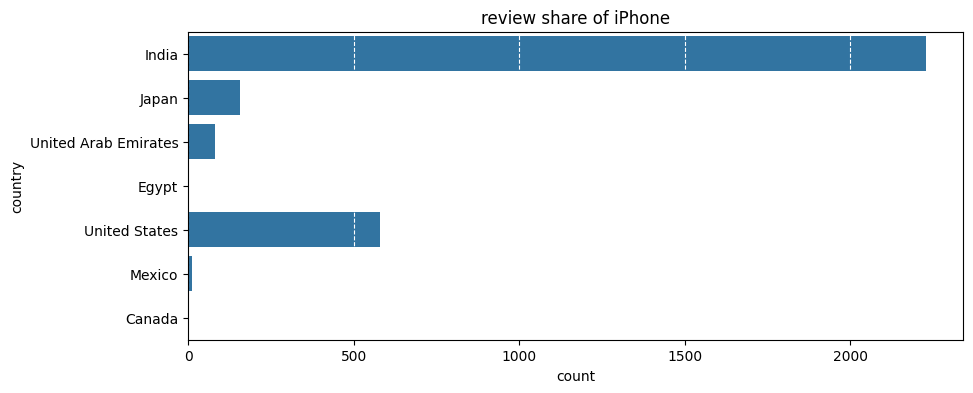

In [ ]:
import seaborn as sns # Importing the seaborn library as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
ax = sns.countplot(y='country', data=df) # Now sns is defined and can be used.
plt.grid(axis='x',linestyle = "--", color ="white")
plt.title("review share of iPhone")
plt.show()

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt
# Generate a list of colors from the colormap
def shade_greens(n):
    cmap = plt.get_cmap('Greens_r', n)
    colors = [cmap(i) for i in range(n)]
    return colors


In [ ]:
# variant_df.Size.value_counts() integrate and it make numeric

import pandas as pd
import re

def extract_numbers(s):
    pattern_size = r'\b(\d+)\s?GB?\b'
    match = re.search(pattern_size, str(s)) # Convert s to string
    if match:
        number = match.group(1)
        return int(number) # Convert the extracted number to an integer
    else:
        return None

variant_df['Size'] = variant_df['Size'].map(extract_numbers)


##Temporal Analysis:


In [ ]:
from datetime import datetime

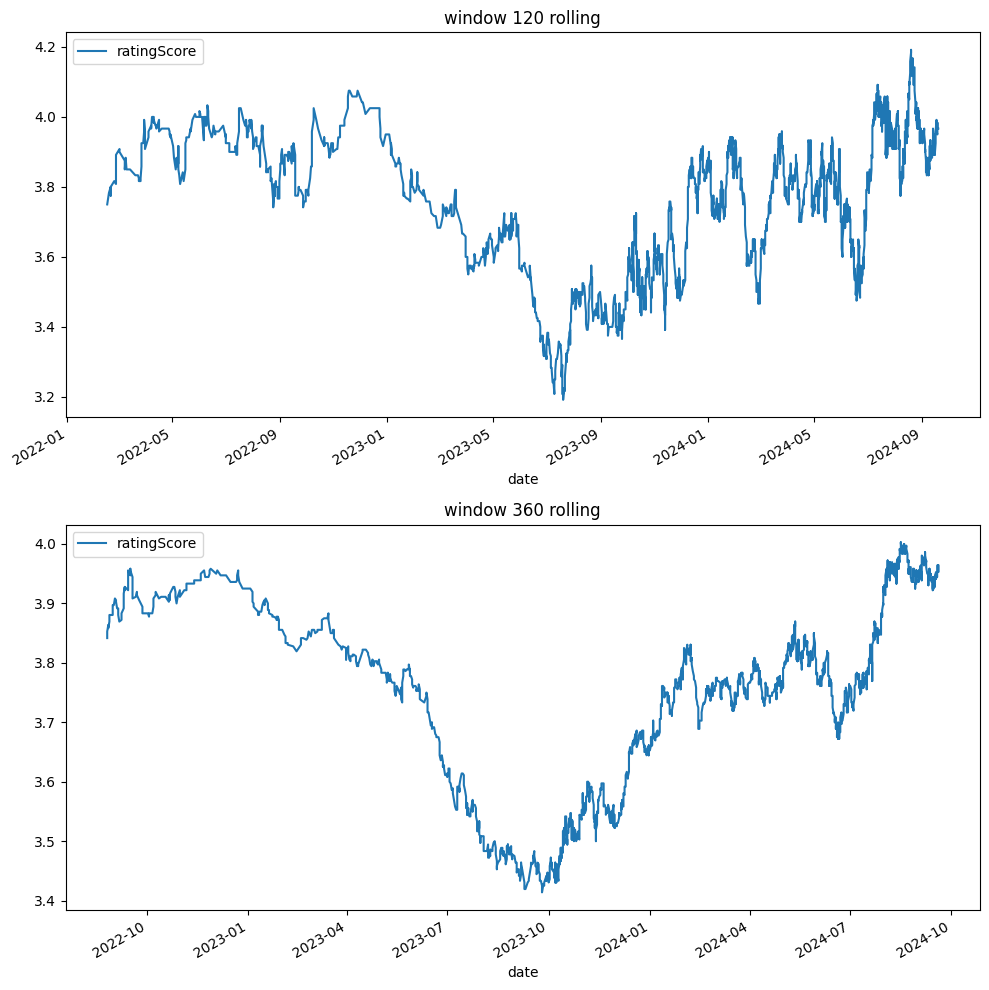

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
time_ratings = df[['date', 'ratingScore']].sort_values(by='date').set_index('date')
time_ratings.rolling(120).mean().plot(ax=ax[0], title='window 120 rolling')
ax[0].grid(axis='x', color='white', linestyle='--')
time_ratings.rolling(360).mean().plot(ax=ax[1], title='window 360 rolling')
ax[1].grid(axis='x', color='white', linestyle='--')

plt.tight_layout()
plt.show()





## Interpetation:
1. it seems that iphone rating drops consistently from fall 2022 to fall 2023 by ~20%
2. however, started to rise from fall 2023 however shows to much up-downs

**## Natural Language Processing (NLP):**


## Create Temporal Columns - Rating is Postive
1. later we will do sentiment analysis on this feature

6. **Create Temporal Columns**
   - Extract `year`, `month`, and `day_of_week` from the `date` column to enable temporal analysis of the reviews.
   - Extract `IsPositiveRating`, and `RatingCategory` from the `ratingScore` column to enable temporal analysis of the reviews.

In [ ]:
#adding features rating Category
print(df.head())
df['IsPositiveRating'] = df['ratingScore'].apply(lambda x: 1 if x >= 4 else 0)
df['RatingCategory'] = df['ratingScore'].apply(lambda x: 'Low' if x <= 2 else ('Medium' if x == 3 else 'High'))
df.head()

  productAsin country       date  isVerified  ratingScore  \
0  B09G9BL5CP   India 2024-08-11        True            4   
1  B09G9BL5CP   India 2024-08-16        True            5   
2  B09G9BL5CP   India 2024-05-14        True            4   
3  B09G9BL5CP   India 2024-06-24        True            5   
4  B09G9BL5CP   India 2024-05-18        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/custom

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin,IsPositiveRating,RatingCategory
0,B09G9BL5CP,India,2024-08-11,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
1,B09G9BL5CP,India,2024-08-16,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
2,B09G9BL5CP,India,2024-05-14,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
3,B09G9BL5CP,India,2024-06-24,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High
4,B09G9BL5CP,India,2024-05-18,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98,1,High


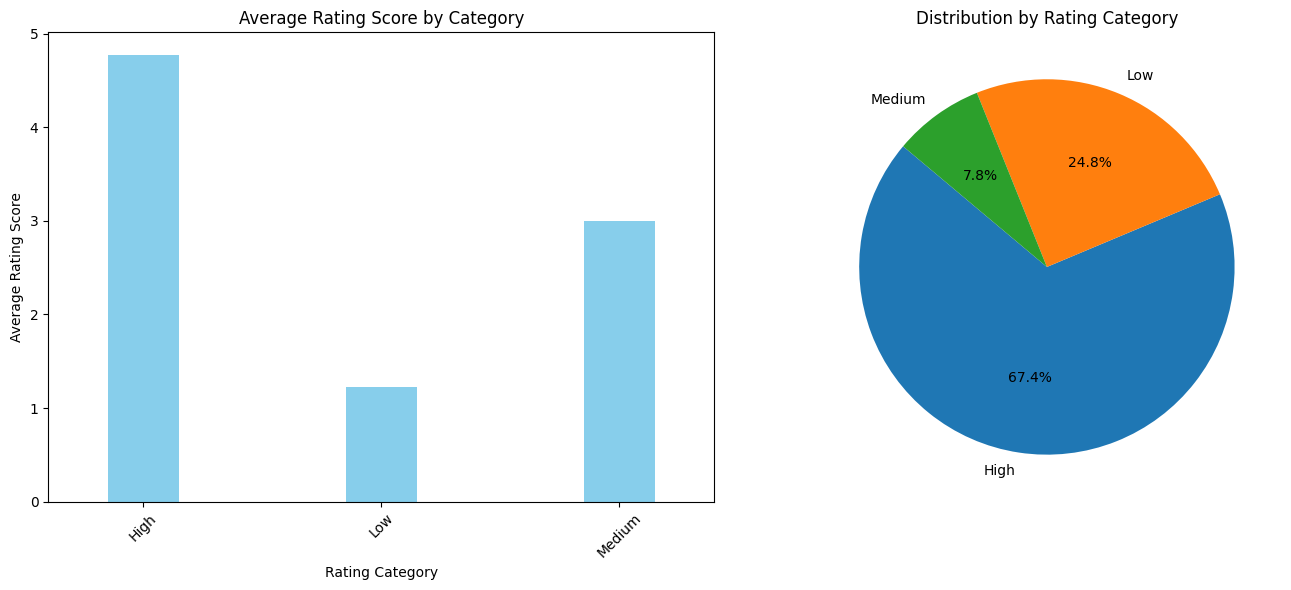

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Calculate average rating per category
avg_rating_per_category = df.groupby('RatingCategory')['ratingScore'].mean()

# Bar plot for average rating by category
avg_rating_per_category.plot(kind='bar', ax=axs[0], color='skyblue',width=0.3)
axs[0].set_xlabel('Rating Category')
axs[0].set_ylabel('Average Rating Score')
axs[0].set_title('Average Rating Score by Category')
axs[0].tick_params(axis='x', rotation=45)

# Plotting the distribution  by Rating Category as a pie chart
rating_counts = df['RatingCategory'].value_counts()
axs[1].pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Distribution by Rating Category')

plt.tight_layout()
plt.show()

# **NLP Prepocessing**
**Convert Text to Lowercase:** Normalize all text by converting it to lowercase to ensure uniformity.

**Remove HTML Tags** and Non-ASCII Characters: Use regular expressions to strip out HTML markup and remove characters that are not part of the standard ASCII set to clean the text.

**Replace Punctuation** Marks with Spaces: Substitute punctuation with spaces to avoid concatenation of words during tokenization, making the text cleaner for analysis.

**Filter Out English Stop Words:** Remove commonly used English words that do not contribute significant meaning (like "the", "is", etc.) to focus on more meaningful words.

**Combine Cleaned Words into a Single String:** Reassemble the individual cleaned words into a cohesive string, ready for further text analysis or processing.

**Output the Final Cleaned Text:** Provide the processed text as output, which is now more structured and suitable for subsequent analytical tasks or machine learning models.

In [ ]:
# regular expression
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
import nltk

nltk.download('stopwords')
print(df.head())

  productAsin country       date  isVerified  ratingScore  \
0  B09G9BL5CP   India 2024-08-11        True            4   
1  B09G9BL5CP   India 2024-08-16        True            5   
2  B09G9BL5CP   India 2024-05-14        True            4   
3  B09G9BL5CP   India 2024-06-24        True            5   
4  B09G9BL5CP   India 2024-05-18        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/custom

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def text_preprocessing(text):
    # Check if the input is a string before applying string operations
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()
        text = re.sub(r'<.*?>|[^\x00-\x7f]', '', text)
        text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

        stop_words = set(stopwords.words("english"))
        words = [word for word in text.split() if word not in stop_words]

        cleaned_text = ' '.join(words)

        return cleaned_text
    else:
        # Handle non-string values (e.g., return an empty string or the original value)
        return ''  # Or return str(text) to convert it to a string

In [ ]:
print(df.head())
df["reviewTitle"] = df["reviewTitle"].apply(text_preprocessing)
df["reviewDescription"] = df["reviewDescription"].apply(text_preprocessing)
df["reviewedIn"] = df["reviewedIn"].apply(text_preprocessing)

  productAsin country       date  isVerified  ratingScore  \
0  B09G9BL5CP   India 2024-08-11        True            4   
1  B09G9BL5CP   India 2024-08-16        True            5   
2  B09G9BL5CP   India 2024-05-14        True            4   
3  B09G9BL5CP   India 2024-06-24        True            5   
4  B09G9BL5CP   India 2024-05-18        True            5   

               reviewTitle                                  reviewDescription  \
0               No charger  Every thing is good about iPhones, there's not...   
1          iPhone 13 256GB  It look so fabulous, I am android user switche...   
2  Flip camera option nill  I tried to flip camera while recording but no ...   
3                  Product                                       100% genuine   
4             Good product         Happy to get the iPhone 13 in Amazon offer   

                                           reviewUrl  \
0  https://www.amazon.in/gp/customer-reviews/R345...   
1  https://www.amazon.in/gp/custom

In [ ]:
import nltk
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

# Importing necessary libraries for machine learning and model evaluation
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Metrics for model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model selection and splitting the dataset
from sklearn.model_selection import train_test_split

# TF-IDF vectorization for text data
from sklearn.feature_extraction.text import TfidfVectorizer

import time
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

---

## **Feature Creation**

In [ ]:
# Creating new combined text features for training and testing datasets
X = df['reviewDescription'] + ' ' + df['reviewTitle']
y = df['IsPositiveRating']
print(X.shape)
print(y.shape)

(3062,)
(3062,)


In [ ]:
#train_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2449,)
(613,)


## **TF-IDF Vectorization**

In [ ]:
!python -m nltk.downloader -d /usr/local/share/nltk_data all

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /usr/local/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-dat

In [ ]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

Lemmatization is a natural language processing (NLP) technique used to reduce words to their base or dictionary form, called the lemma. Unlike stemming, which simply chops off word endings, lemmatization takes the context and part of speech (POS) into account, producing linguistically valid base forms of words.


In [ ]:
import nltk
nltk.download('punkt_tab') # Downloading the 'punkt_tab' resource

# Initializing the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag


# Initialize the lemmatizer
class Lemmatizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    # Function to convert nltk POS tags to WordNet POS tags
    def get_wordnet_pos(self, tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return None

    def lemmatize(self, text):
        tokens = word_tokenize(text)
        tagged_tokens = pos_tag(tokens)
        lemmatized_tokens = []
        for token, tag in tagged_tokens:
            wordnet_pos = self.get_wordnet_pos(tag) or wordnet.NOUN
            lemma = self.lemmatizer.lemmatize(token, pos=wordnet_pos)
            lemmatized_tokens.append(lemma)

        return ' '.join(lemmatized_tokens)


tfidf_vectorizer = TfidfVectorizer(tokenizer=Lemmatizer().lemmatize, ngram_range=(1, 2))

# Before applying fit_transform, handle the missing values in X_train and X_test
X_train = X_train.fillna('')  # Replace NaN values with empty strings in X_train
X_test = X_test.fillna('')   # Replace NaN values with empty strings in X_test

# Transforming the text data into TF-IDF vectors for both training and testing datasets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # Fit and transform on training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)  # Only transform on test data

# Printing the shape of the resulting TF-IDF feature matrices
print("\nTF-IDF feature matrix shape for training data:", X_train_tfidf.shape)
print("TF-IDF feature matrix shape for test data:", X_test_tfidf.shape)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



TF-IDF feature matrix shape for training data: (2449, 861)
TF-IDF feature matrix shape for test data: (613, 861)


## Test on some random samples
- test with your random reviews



## Natural Language Processing (NLP):
**TF-IDF Vectorization:** Textual data was converted into numerical vectors using TF-IDF (Term Frequency-Inverse Document Frequency), which represents how important a word is to a document in a corpus. This helped in distinguishing meaningful words that influence sentiment classification.

**DistilBERT** Fine-tuning: DistilBERT uses attention mechanisms that capture relationships between all words in a sentence, allowing it to understand complex contextual cues. The fine-tuning on the iPhone sentiment dataset significantly improved the model's ability to classify sentiments accurately.

**DistilBERT** is a smaller, faster, and more efficient version of BERT (Devlin et al., 2018), fine-tuned for sentiment analysis. The model uses the transformer architecture to capture the deep semantic relationships between words in a sentence, allowing it to understand the context effectively.

1. Case1. Already fine-tuned llm model - distil-bert-finetuned on sst-2

In [ ]:
# Creating new combined text features for training and testing datasets
X = df['reviewDescription'] + ' ' + df['reviewTitle']
y = df['IsPositiveRating']
print(X.shape)
print(y.shape)

(3062,)
(3062,)


In [ ]:
from transformers import pipeline

In [ ]:
from transformers import pipeline
import os

# Authenticate with Hugging Face if needed
# !huggingface-cli login

# Setting model
model = 'distilbert-base-uncased-finetuned-sst-2-english'


sentiment_pipe = pipeline(
    task="sentiment-analysis",
    model=model,
    device='cpu',  # Change device to 'cpu' if needed
    truncation=True,  # Truncate long sequences to the maximum length
    max_length=512  # Set maximum sequence length to 512
)

Device set to use cpu


In [ ]:
# test on random samples
sample = ['iphone battery sucks, when ever i connect to charger it takes 2 hours to charge fully',
         'i love iphone but this time they have not good battery life',
         'This iphone camera is amazing, and so the color purple.',
         'iPhone is amazing',
         'Charger is so bad, i returned the order']

mapper = lambda x : 'Negative Rating ' if x == 0 else 'Positive Rating'
labels = [0, 0, 1, 1, 0]
sample_y = list(map(mapper, labels))

y_pred = sentiment_pipe(sample)

print(f"{'Sample':<33} | {'Predict':<9}| {'Actual':<5}")
for s, y_, y in zip(sample, y_pred, sample_y):
    print(f"{s[:30]:<30}... | {y_['label']:>5} | {y:>5}")

Sample                            | Predict  | Actual
iphone battery sucks, when eve... | NEGATIVE | Negative Rating 
i love iphone but this time th... | NEGATIVE | Negative Rating 
This iphone camera is amazing,... | POSITIVE | Positive Rating
iPhone is amazing             ... | POSITIVE | Positive Rating
Charger is so bad, i returned ... | NEGATIVE | Negative Rating 


 **Key Factors Influencing Ratings
Analysis of Product Features**

**Storage capacity:**
128GB variants dominate usage, indicating economic and accessibility factors.
Higher capacities (e.g., 512GB) show limited engagement.

**Color preferences:**
"Blue" and "Midnight" are most popular, but data inconsistencies in color naming require cleaning.
Product condition:
"Scratches" and "screen" were frequent words in reviews, hinting at common customer concerns.

**Hypothesis Testing:**
Statistical tests (e.g., ANOVA or t-tests) can validate the influence of country, product variant, and verification status on sentiment.

Observed trends, such as differences in rating averages across countries and storage capacities, suggest significant variance in preferences.


Ratings dropped by ~20% between Fall 2022 and Fall 2023, followed by a slight recovery with fluctuations.

Seasonal Effects:
Product launches or holiday seasons may influence spikes in ratings, possibly tied to customer excitement or expectations.
Insights:
Monitoring temporal trends can reveal actionable insights, such as optimizing product features or marketing campaigns during specific periods.

**Summary**

**Influencing Factors:** Features like storage, color, and product condition significantly impact sentiment.

**Model Comparison:** Random Forest outperformed DistilBERT, though LLMs hold promise for nuanced language analysis.

**Temporal Analysis:** Ratings trends indicate opportunities to align product launches and marketing with customer sentiment.



